In [ ]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

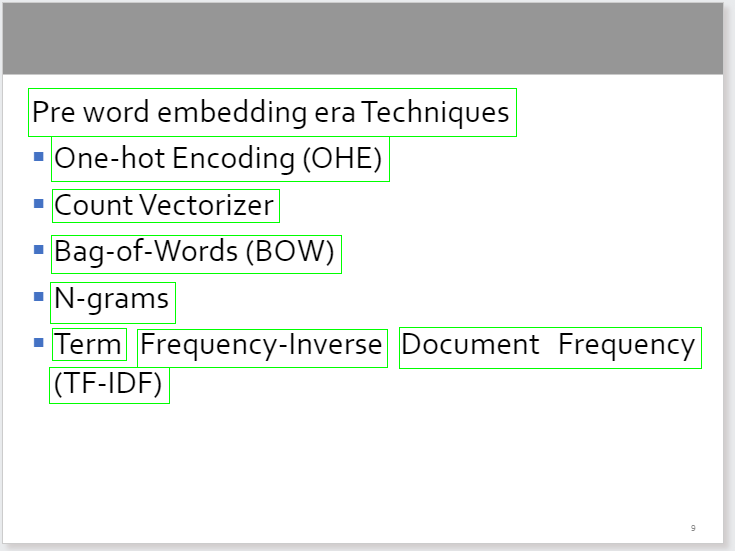

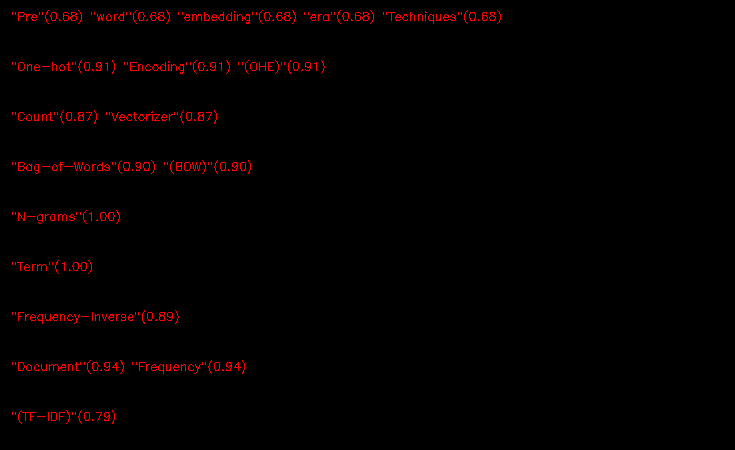

In [ ]:
import easyocr
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread('picture.png')

results = reader.readtext(img, detail=1, paragraph=False)

# Create a new black image with the same width as the input image and a height of 50 pixels per OCR result
text_img = np.zeros((50 * len(results), img.shape[1], 3), dtype=np.uint8)

# Initialize the current_y variable to track the vertical position where the text will be displayed
current_y = 20

for (bbox, text, prob) in results:
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()

    # Enclose each word in double quotes, include the probability score and join them with spaces
    words_with_scores = [f'"{word}"({prob:.2f})' for word in text.split()]
    quoted_text_with_scores = ' '.join(words_with_scores)

    # Draw a green rectangle around the detected text
    cv2.rectangle(img, tl, br, (0, 255, 0), 1)

    # Put red quoted text with scores on the new black image
    cv2.putText(text_img, quoted_text_with_scores, (10, current_y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)

    # Update current_y
    current_y += 50

# Show the original image with rectangles
cv2_imshow(img)

# Show the separate image with quoted text and scores
cv2_imshow(text_img)


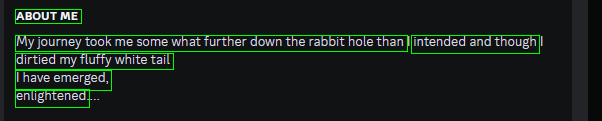

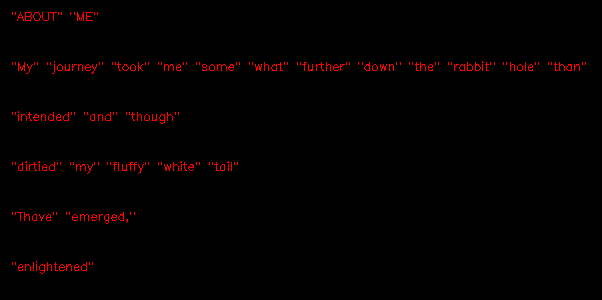

In [ ]:
import easyocr
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread('pic.PNG')

results = reader.readtext(img, detail=1, paragraph=False)

# Create a new black image with the same width as the input image and a height of 50 pixels per OCR result
text_img = np.zeros((50 * len(results), img.shape[1], 3), dtype=np.uint8)

# Initialize the current_y variable to track the vertical position where the text will be displayed
current_y = 20

for (bbox, text, prob) in results:
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()

    # Enclose each word in double quotes and join them with spaces
    quoted_text = ' '.join([f'"{word}"' for word in text.split()])

    # Draw a green rectangle around the detected text
    cv2.rectangle(img, tl, br, (0, 255, 0), 1)

    # Put red quoted text on the new black image
    cv2.putText(text_img, quoted_text, (10, current_y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)

    # Update current_y
    current_y += 50

# Show the original image with rectangles
cv2_imshow(img)

# Show the separate image with quoted text
cv2_imshow(text_img)


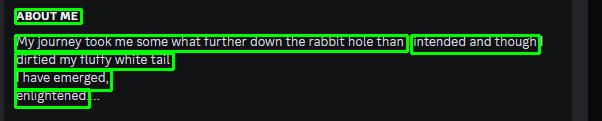

                                                   0
0                                           ABOUT ME
1  My journey took me some what further down the ...
2                                intended and though
3                       dirtied my fluffy white tail
4                                     Thave emerged,
5                                        enlightened





In [ ]:
import easyocr
import cv2
import pandas 
from google.colab.patches import cv2_imshow
from tabulate import tabulate
import pandas as pd

##Image source
img = cv2.imread('pic.PNG')

results = reader.readtext(img, detail=1, paragraph=False) #Detail = 0 or 1
results2 = reader.readtext(img, detail=0, paragraph=False)

for (bbox, text, prob) in results:

    #Define bounding boxes
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    #Remove non-ASCII
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()

    #Put rectangles and text on the image
    cv2.rectangle(img, tl, br, (0, 255, 0), 2)
    #cv2.putText(img, text, (tl[0], tl[1] - 10), 
                #cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

cv2_imshow(img)

newlist = []
counter=0
for i in results2:
  #print(counter, ": ", i)
  templist = []
  templist.insert(counter, i)
  #print(templist)
  newlist.append(templist)
  counter=counter+1

dataframe = pd.DataFrame(newlist)
print(dataframe)
print('\n\n')
